In [25]:
# Import some things
import cv2
import glob
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

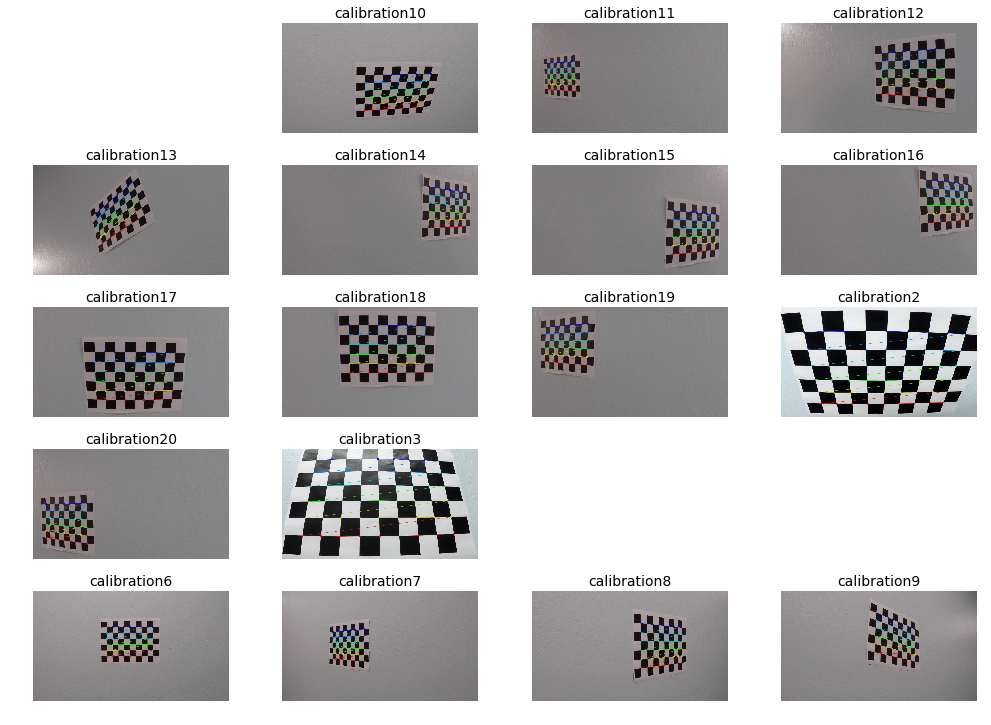

In [39]:
# Inside Corners X/Y
nx = 9
ny = 6

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Store Calibration Points
objpoints = [] # 3d
imgpoints = [] # 2d

# Calibration Images
images = glob.glob('./camera_cal/calibration*.jpg')
num_images = len(images)
plot_cols = int(np.ceil(num_images / 5))
plot_rows = int(np.ceil(num_images / plot_cols))

# Set up plotting of calibration images
fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(14, 10))
axes = axes.ravel()
fig.tight_layout()

# Iterate images
for index, fname in enumerate(images):
    img = cv2.imread(fname)
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    ax = axes[index]
    ax.axis('off')
    if ret == True:
        # Found corners
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        ax.set_title('fname.split('/')[-1].split('.')[0]', fontsize=14)
        ax.imshow(img)
    else:
        fig.delaxes(ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

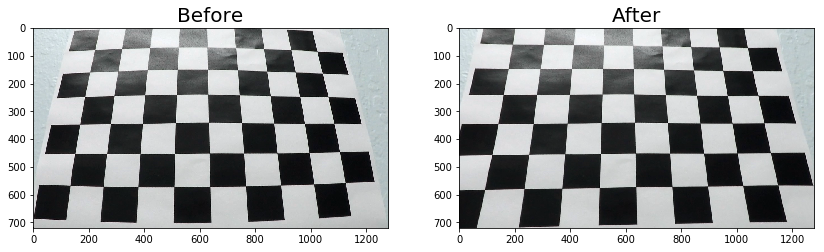

In [47]:
# Get a random image
img = cv2.imread(images[random.randint(0, num_images - 1)])
img_size = (img.shape[1], img.shape[0])

# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Undistort image
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

# Save the camera matrix and the distortion coefficients
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open("camera_calibration.p", "wb"))

# Plot undistortion result
f, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(14,10))
ax_l.set_title('Before', fontsize=20)
ax_l.imshow(img)
ax_r.set_title('After', fontsize=20)
ax_r.imshow(undistorted)